**Problem 2 (50 points)**

Consider the continuous signal x(t) = 2 cos(5t) + 7 sin(10t), which is 
sampled at a frequency of 20 samples per second. Assuming a granularity 
of h= 0.01 seconds:

a) Write a routine to extrapolate the signal with zero order holder.

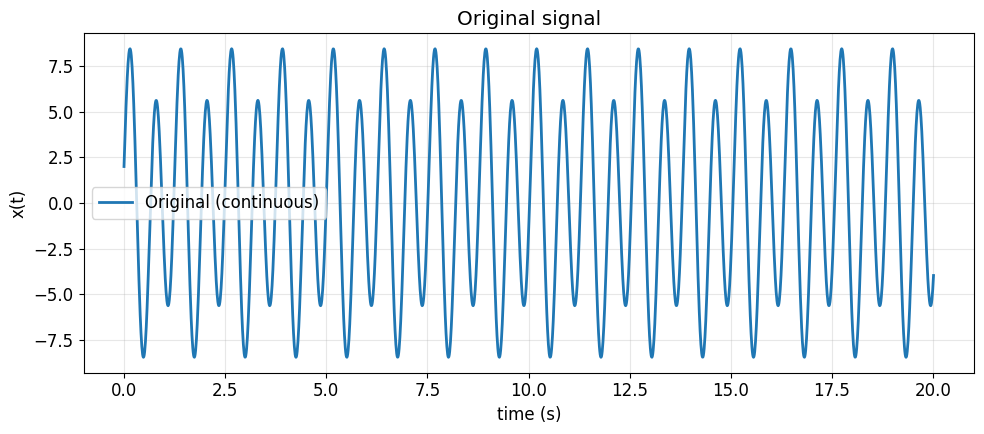

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Problem setup
# ----------------------------
# Continuous-time signal
def x_true(t):
    return 2*np.cos(5*t) + 7*np.sin(10*t)

fs = 20.0                  # samples per second
Ts = 1.0/fs                # sampling interval
h  = 0.01                  # granularity
T_end = 20.0               # total duration (seconds)

# Time grids
t_cont = np.arange(0.0, T_end + h, h)      # dense "continuous" grid for display/metrics
t_s    = np.arange(0.0, T_end + Ts, Ts)    # sampling instants

# Samples
x_s = x_true(t_s)
x_c = x_true(t_cont)

# ----------------------------
# (b) Plot: original vs ZOH
# ----------------------------
plt.figure(figsize=(10, 4.5))
plt.plot(t_cont, x_c, label="Original (continuous)", lw=2)
plt.xlabel("time (s)")
plt.ylabel("x(t)")
plt.title("Original signal")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

b) Show the graph of the original signal and its zero-order approximation.

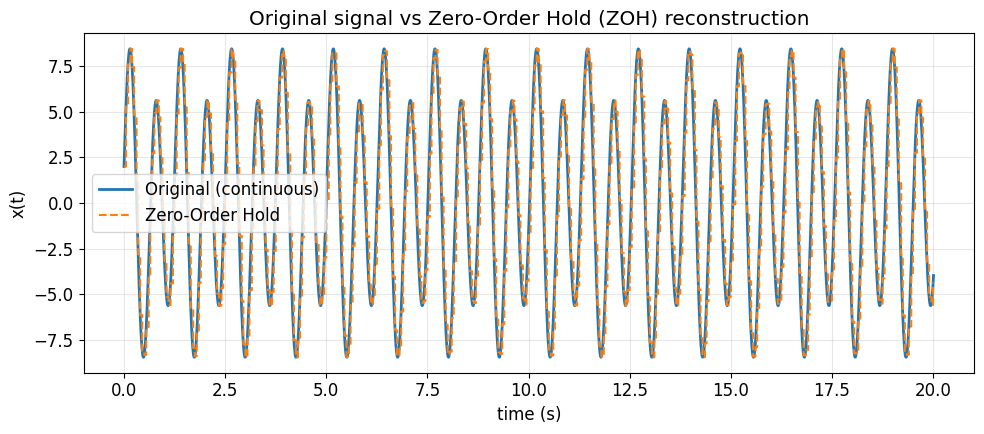

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# (a) Zero-Order Hold routine
# ----------------------------
def zoh_reconstruct(t_eval, t_samples, x_samples):
    """
    Zero-Order Hold reconstruction:
    For each time in t_eval, hold the most recent sample value.
    """
    idx = np.searchsorted(t_samples, t_eval, side="right") - 1
    idx = np.clip(idx, 0, len(x_samples)-1)
    return x_samples[idx]

x_zoh = zoh_reconstruct(t_cont, t_s, x_s)

# ----------------------------
# (b) Plot: original vs ZOH
# ----------------------------
plt.figure(figsize=(10, 4.5))
plt.plot(t_cont, x_c, label="Original (continuous)", lw=2)
plt.step(t_cont, x_zoh, where="post", label="Zero-Order Hold", linestyle="--")
plt.xlabel("time (s)")
plt.ylabel("x(t)")
plt.title("Original signal vs Zero-Order Hold (ZOH) reconstruction")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


c) Show the graph of the original signal and its second-order approximation.

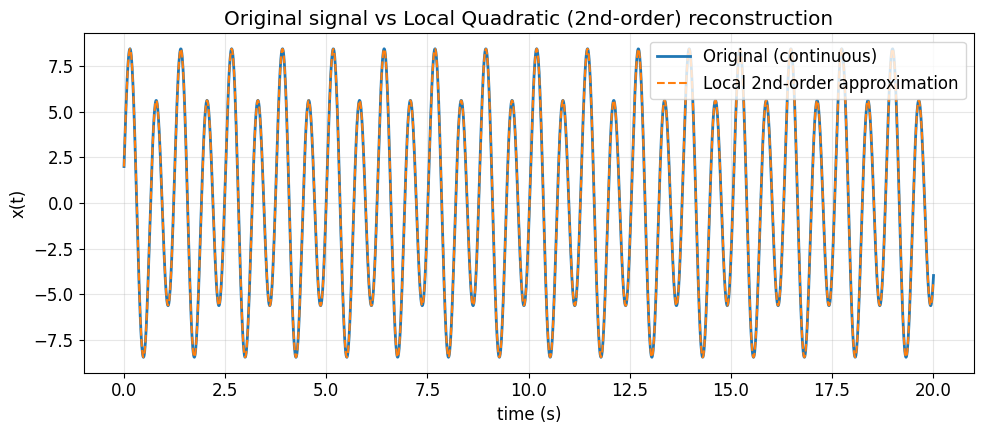

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------
# (c) Local 2nd-order (quadratic) approximation
# -------------------------------------------
def quad_local_reconstruct(t_eval, t_samples, x_samples):
    """
    Piecewise local quadratic (2nd-order) interpolation using three nearby samples.
    On each interval [t_i, t_{i+1}), fit a degree-2 polynomial through:
      - (i == 0)        -> nodes [0, 1, 2]
      - (i == N-2)      -> nodes [N-3, N-2, N-1]
      - otherwise       -> nodes [i-1, i, i+1]
    Then evaluate that polynomial on the sub-interval mask.
    """
    y = np.empty_like(t_eval, dtype=float)
    N = len(t_samples)

    # For last time point, include it in the last interval mask
    for i in range(N-1):
        if i < N-2:
            mask = (t_eval >= t_samples[i]) & (t_eval < t_samples[i+1])
        else:
            mask = (t_eval >= t_samples[i]) & (t_eval <= t_samples[i+1])

        if not np.any(mask):
            continue

        if i == 0:
            idxs = [0, 1, 2] if N >= 3 else list(range(min(3, N)))
        elif i == N-2:
            idxs = [N-3, N-2, N-1] if N >= 3 else list(range(max(0, N-3), N))
        else:
            idxs = [i-1, i, i+1]

        t_nodes = t_samples[idxs]
        x_nodes = x_samples[idxs]

        # Fit quadratic and evaluate
        coeffs = np.polyfit(t_nodes, x_nodes, 2)  # degree 2
        y[mask] = np.polyval(coeffs, t_eval[mask])

    return y

x_quad = quad_local_reconstruct(t_cont, t_s, x_s)


# ----------------------------
# (c) Plot: original vs 2nd-order
# ----------------------------
plt.figure(figsize=(10, 4.5))
plt.plot(t_cont, x_c, label="Original (continuous)", lw=2)
plt.plot(t_cont, x_quad, label="Local 2nd-order approximation", linestyle="--")
plt.xlabel("time (s)")
plt.ylabel("x(t)")
plt.title("Original signal vs Local Quadratic (2nd-order) reconstruction")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



d) Analyze the results and provide the proper comments.